In [21]:
import pandas as pd
from sklearn.feature_selection import SelectKBest

# Load the data
X_train= pd.read_csv("../train/pheno_training_treated.csv")
y_train = X_train.PrevalentHFAIL + X_train.Event
y_train = y_train.map({2:1, 1:1, 0:0})

X_test = pd.read_csv("../test/pheno_test_treated.csv")
y_test = X_test.PrevalentHFAIL + X_test.Event
y_test = y_test.map({2:1, 1:1, 0:0})

X_train.drop(columns=["Sample_ID", "Event_time", "PrevalentHFAIL", "Event"], inplace=True)
X_test.drop(columns=["Sample_ID", "Event_time", "PrevalentHFAIL", "Event"], inplace=True)


In [22]:
selector = SelectKBest(k=6)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_select = selector.transform(X_test)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Print the selected features
print(selected_features)

Index(['Age', 'BodyMassIndex', 'Smoking', 'PrevalentCHD', 'SystolicBP',
       'NonHDLcholesterol'],
      dtype='object')


PECC accuracy: 0.8999447208402432


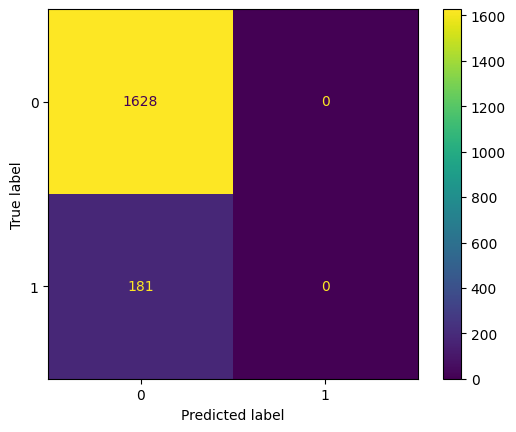

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1628
           1       0.00      0.00      0.00       181

    accuracy                           0.90      1809
   macro avg       0.45      0.50      0.47      1809
weighted avg       0.81      0.90      0.85      1809



/home/rui/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rui/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rui/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Initialize the model
clf = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the PECC accuracy
pec_acc = (y_test == y_pred).mean()
print("PECC accuracy:", pec_acc)

# Plot the confusion matrix
cm_logreg = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=clf.classes_)
disp1.plot()
plt.show()

# print the classification report
print(classification_report(y_test, y_pred))